<a href="https://colab.research.google.com/github/Annergeticaura/Logistic-Regression-From-Scratch/blob/main/LoR_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Building a Logistic Regression model from scratch

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Loss function calculates the binary cross entropy (or log loss) as:
entropy e=1/n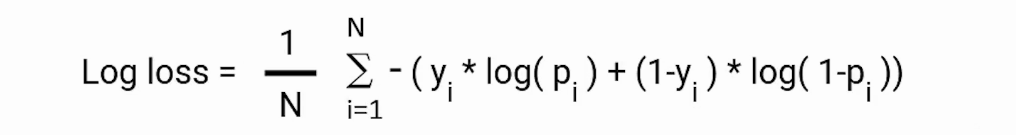

In [ ]:
# def loss_function(self, y_true, y_pred):
#         # binary cross entropy
#         ep = 1e-9 #adjusted value in logarithmic function to avoid log of 0, which is undefined
#         y = y_true * np.log(y_pred + ep) + (1-y_true) * np.log((1 - y_pred) + ep)
#         y = -np.mean(y)
#         return y

This is where the standard formula used for linear regression is transformed to provide a value within the range of [0,1], which is essential for binary classification.
Initially Y= X. WT + B
W= weight
B=bias.
But this has a unbound range.
To convert this into values closer to 0 and 1 we perform odds transformation as:
Y\(1-Y)= X. WT + B.
Now finally to get this into [0,1] we find log odds transformation or logit function:
loge(Y\(1-Y))=  X. WT + B.
Now to derive the value of Y from this we get:
Y=1/(1+e-(X. WT + B))
Thus forming the sigmoid function.

In [ ]:
#  def forward(self,X):
#         y = np.dot(X, self.weight.T) + self.bias
#         y = np.clip(y, -500, 500)  # Clip to prevent overflow
#         y = 1 / (1 + np.exp(-y))
#         return y

Now we get to training the model.
1.   Initialize the weights
2.   Perform gradient descent as Weight W= W- learning_rate x dW and bias as B= B- learningrate x dB
3.   dW, dB are the partial differenciation of weights and bias values. The derivation is done using chain rule and the mean value is taken (1/num_rows)



In [ ]:
# def train(self, X, y):
#         num_rows = X.shape[0] #Number of Rows
#         num_cols = X.shape[1] #Number of Columns
#         #Weight and Bias Initialization
#         limit=np.sqrt(6/(num_rows+num_cols))
#         self.weight = np.random.uniform(-limit, limit, size=num_cols) #Glorot Initialization from ND
#         self.bias = 0

#         # gradient descent
#         for _ in range(self.epoch):
#             y_pred = self.forward(X)

#             dz = y_pred - y #difference of actual and predicted
#             # compute gradients using partial differenciation
#             dw = (1 / num_rows) * np.dot(dz.T, X) #mean of dot product of X transpose and difference of actual and predicted
#             db = (1 / num_rows) * np.sum(dz)

#             # update parameters
#             self.weight -= self.lr * dw
#             self.bias -= self.lr * db

Predicting the values using the new found weights and bias values in the sigmoid function that minimizes error. Since the values are still continuous within [0,1]. To make the values binary a threshold value is used to convert them to 0 and 1.

In [ ]:
# def predict(self, X):
#         threshold = 0.5 #general threshold value for sigmoid functions
#         y_hat = np.dot(X, self.weight.T) + self.bias
#         y_predicted =1 / (1 + np.exp(-y_hat))
#         y_predicted_cls = [1 if i > threshold else 0 for i in y_predicted]

#         return np.array(y_predicted_cls)


Plot function for the elbow plot (Add this in the plot function defined below using the losses and epoch lists)

In [ ]:
# def plot(self, loss, epoch):
#       plt.plot(epoch, loss)
#       plt.xlabel('Number of Epochs')
#       plt.ylabel('Loss')
#       plt.title('Cost Slope Analysis')
#       plt.show()

Plot the classes

In [ ]:
# def plot(self, X_test, y_pred):
#         plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis')
#         plt.xlabel('Feature 1')
#         plt.ylabel('Feature 2')
#         plt.title('Scatter plot of predicted classes')
#         plt.show()

Entire code

In [48]:
class LOR:
    def __init__(self, learning_rate, epoch):
        self.lr = learning_rate
        self.epoch = epoch
        self.weight = None
        self.bias = None
        self.losses = [] #use this to find the loss vs epoch plot (elbow plot) to check for the optimum epoch number

    def loss_function(self, y_true, y_pred):
        # binary cross entropy
        ep = 1e-9 #adjusted value in logarithmic function to avoid log of 0, which is undefined
        y_pred = np.clip(y_pred, ep, 1 - ep)  # Clip values to avoid log(0) or log(1)
        y = y_true * np.log(y_pred) + (1 - y_true) * np.log(1-y_pred)
        y = y_true * np.log(y_pred + ep) + (1-y_true) * np.log((1 - y_pred) + ep)
        y = -np.mean(y)
        return y

    def forward(self,X):
        y = np.dot(X, self.weight.T) + self.bias
        # y = np.clip(y, -500, 500)  # Clip to prevent overflow
        y = 1 / (1 + np.exp(-y))
        return y

    def train(self, X, y):
        num_rows = X.shape[0] #Number of Rows
        num_cols = X.shape[1] #Number of Columns
        #Weight and Bias Initialization
        limit=np.sqrt(6/(num_rows+num_cols))
        self.weight = np.random.uniform(-limit, limit, size=num_cols) #Glorot Initialization from ND
        self.bias = 0

        # gradient descent
        for _ in range(self.epoch):
            y_pred = self.forward(X)

            dz = y_pred - y #difference of actual and predicted
            # compute gradients using partial differenciation
            dw = (1 / num_rows) * np.dot(dz.T, X) #mean of dot product of X transpose and difference of actual and predicted
            db = (1 / num_rows) * np.sum(dz)

            # update parameters
            self.weight -= self.lr * dw
            self.bias -= self.lr * db


    def predict(self, X):
        threshold = 0.5 #general threshold value for sigmoid functions
        y_final = np.dot(X, self.weight.T) + self.bias
        y_predicted =1 / (1 + np.exp(-y_final))

        # y_predicted_cls = [1 if y_predicted>0.5 else 0 for i in y_predicted]
        y_predicted_cls = np.where(y_predicted > 0.5, 1, 0)
        # print(y_predicted_cls)
        return np.asarray(y_predicted_cls)

    def plot(self, X_test, y_pred):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Scatter plot of predicted classes')
        plt.show()

Testing the model using breast cancer dataset from sklearn for accuracy.

In [50]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score

dataset = datasets.load_breast_cancer()
X, y = dataset.data, dataset.target

X, y = dataset.data, dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
epoch=1000
model = LOR(learning_rate=0.0001, epoch=epoch)
model.train(X_train, y_train)
y_pred = model.predict(X_test)

acc=accuracy_score(y_test, y_pred)
print("Predicted values")
print(y_pred)
print("Accuracy score:")
print(acc)

Predicted values
[1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1
 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0
 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0
 0 0 0]
Accuracy score:
0.9035087719298246


In [43]:
y_test

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0])

In [44]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0])

Plot the classes using matplotlib

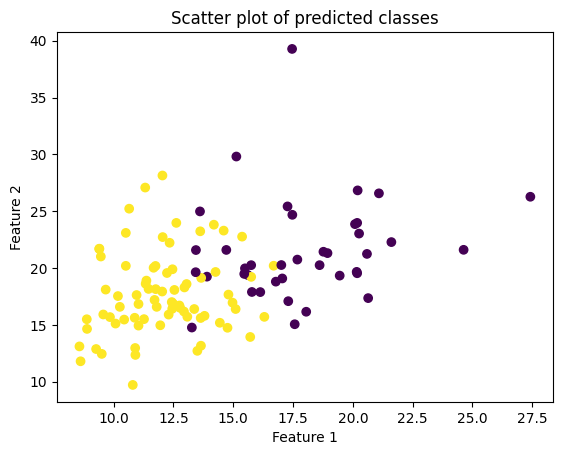

In [45]:
regressor.plot(X_test, y_pred)

Thanks for making it this far!